# ProsperLoan Data Analysis
## by Sangwon

## Preliminary Wrangling

> `ProsperLoan` contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
import warnings

%matplotlib inline
warnings.filterwarnings(action = 'ignore')

In [2]:
def hide_code_in_slideshow():   
    from IPython import display
    import binascii
    import os
    uid = binascii.hexlify(os.urandom(8)).decode()    
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;
            while (!p.hasClass("cell")) {
                p=p.parent();
                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display.display_html(html, raw=True)

In [3]:
df = pd.read_csv("./prosperLoanData.csv")

print(df.shape)
df.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### What is the structure of your dataset?
There are 113,937 loans in the dataset with 81 features. I can split this dataset features two main categories:
1. Borrower's information
1. Loan information

### What is/are the main feature(s) of interest in your dataset?
From an investor's point of view, it seems that I am interested in maximizing the actual return on investment and stable investment. In other words, the main features of interest are `EstimatedReturn` and `ActualReturn`.
1. `EstimatedReturn` - The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.
1. `ActualReturn` - Actual Returns are based on actual payments (other than principal) received by the investor net of fees and losses (including from charged-off loans).  To be included in the Actual Return calculation, the loan must have originated (a) on or after July 1, 2009, and (b) at least 12 months prior to the calculation date.1 [ref](https://prosper.zendesk.com/hc/en-us/articles/360001288366-Frequently-Asked-Questions-about-Historical-Returns)


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
In this dataset has so many columns(it has 81 cols). I think following features are helpful for maximize return and minimize risk investment.
1. `IncomeRange` - The income range of the borrower at the time the listing was created.
1. `DebtToIncomeRatio` - The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
1. `CreditGrade` - The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
1. `ProsperRating (Alpha)` - The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
1. `EmploymentStatusDuration` - The length in months of the employment status at the time the listing was created.

### Feature Engineering
#### `Actual Return`

In [6]:
df['ActualReturn'] = df['LP_CustomerPayments'] - df['LoanOriginalAmount'] - (df['LP_ServiceFees'] + df['LP_CollectionFees'] + df['LP_NetPrincipalLoss'])
df['ActualReturn'] = 1 + (df['ActualReturn'] / df['LoanOriginalAmount'])

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Main Features

#### `DebtToIncomeRatio`

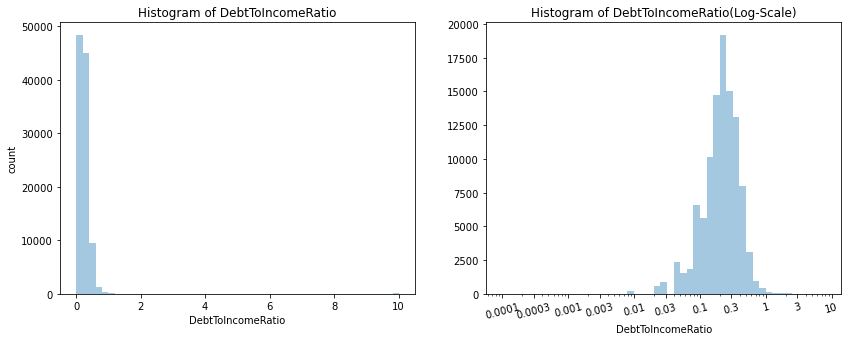

In [7]:
hide_code_in_slideshow()
xbins = 10**np.arange(-4, 1, 0.1)
xticks = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
xticklabels = [f"{tick}" for tick in xticks]

fig, axes = plt.subplots(1,2,figsize = (14, 5))

sb.distplot(df['DebtToIncomeRatio'], bins = 50, kde = False, ax = axes[0])
sb.distplot(df['DebtToIncomeRatio'], bins = xbins, kde = False, ax = axes[1])

axes[0].set_ylabel('count')

axes[0].set_title("Histogram of DebtToIncomeRatio")
axes[1].set_title("Histogram of DebtToIncomeRatio(Log-Scale)")
axes[1].set_xscale('log')
axes[1].set_xticks(xticks)
axes[1].set_xticklabels(xticklabels, rotation = 15)
plt.show()

* `DebtToIncomeRatio` is the long-tail distribution and left-skewed.

#### `CreditGrade` and `ProsperRating (Alpha)`
* There are no overlapped `CreditGrade` and `ProsperRating (Alpha)`.
* Prosper transitioned from `CreditGrade` to `ProsperRating (Alpha)` since 2009 years.
* Credit Grade of No Credit(NC) must be changed( to `E` grade) for merging with `ProsperRating (Alpha)`

In [8]:
# check overlapping
df.loc[df['CreditGrade'].notnull() & df['ProsperRating (Alpha)'].notnull(), ['CreditGrade', 'ProsperRating (Alpha)']].shape

(0, 2)

In [9]:
# change `CreditGrade` NC to E grade
df['CreditGrade'].replace('NC', 'E', inplace = True)

In [10]:
df['ProsperRating (Alpha)'].fillna("", inplace = True)
df['CreditGrade'].fillna("", inplace = True)

In [11]:
# merge two columns
df['ProsperRating'] = df['ProsperRating (Alpha)'] + df['CreditGrade']
df['ProsperRating'].value_counts()

C     23994
B     19970
D     19427
A     17866
E     13225
HR    10443
AA     8881
        131
Name: ProsperRating, dtype: int64

In [12]:
# remove empty values
df = df.query("ProsperRating != ''")
df['ProsperRating'].value_counts()

C     23994
B     19970
D     19427
A     17866
E     13225
HR    10443
AA     8881
Name: ProsperRating, dtype: int64

In [13]:
# dtype change to ordinal
ordinal_rating = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
df['ProsperRating'] = df['ProsperRating'].astype(ordered_var)

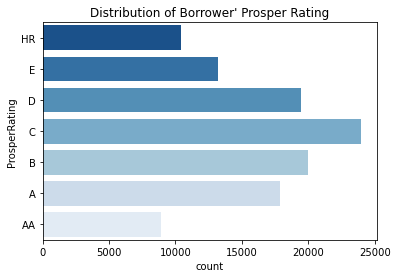

In [14]:
hide_code_in_slideshow()
ax = sb.countplot(data = df, y = 'ProsperRating', palette = 'Blues_r')
ax.set_title('Distribution of Borrower\' Prosper Rating')
plt.show()

#### `EmploymentStatusDuration`

In [15]:
print(df['EmploymentStatusDuration'].isna().sum())
df['EmploymentStatusDuration'].describe()

7625


count    106181.000000
mean         96.098511
std          94.502961
min           0.000000
25%          26.000000
50%          67.000000
75%         137.000000
max         755.000000
Name: EmploymentStatusDuration, dtype: float64

* Distribution of EmploymentStatusDuration is very widely from 0 to 755.

Text(0.5, 1.0, 'Distribution of Employment Status Duration')

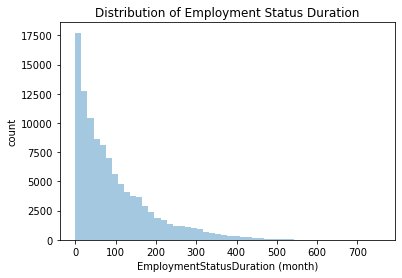

In [16]:
hide_code_in_slideshow()
ax = sb.distplot(df['EmploymentStatusDuration'], kde = False)

ax.set_xlabel('EmploymentStatusDuration (month)')
ax.set_ylabel('count')
ax.set_title('Distribution of Employment Status Duration')

* Distribution of Employment Status Duration is long-tail and left-skewed.
* Especially distributed at 0

#### `IncomeRange`

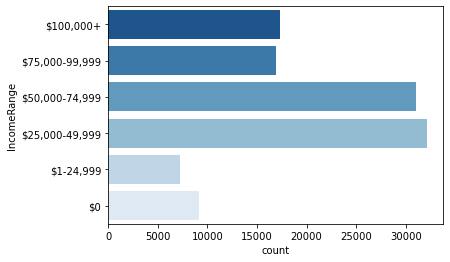

In [17]:
hide_code_in_slideshow()
df['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)
labels = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']

ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = labels)
df['IncomeRange'] = df['IncomeRange'].astype(ordered_var)

ax = sb.countplot(data = df, y = 'IncomeRange', palette='Blues_r')

#### `EstimatedReturn`

In [18]:
df['EstimatedReturn'].describe()

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

<AxesSubplot:xlabel='EstimatedReturn'>

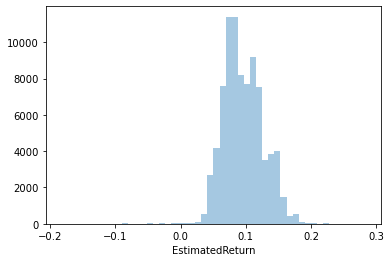

In [19]:
sb.distplot(df['EstimatedReturn'], kde = False)

* `EstimatedReturn` mean is approximately 0.1, and its distribution is almost gaussian.
* Maybe it seem to very ideal case.

#### `ActualReturn`

<AxesSubplot:xlabel='ActualReturn'>

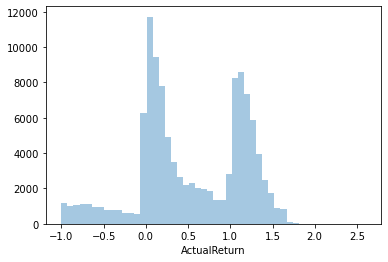

In [20]:
sb.distplot(df['ActualReturn'], kde = False)

* It looks very odd distribution.
* There is three peaks approximately at -1, 0, 1

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

`DebtToIncomeRatio`
* `DebtToIncomeRatio` is the long-tail distribution and left-skewed.

`EmploymentStatusDuration`
* Distribution of Employment Status Duration is long-tail and left-skewed.
* Especially distributed at 0

`EstimatedReturn`
* `EstimatedReturn` mean is approximately 0.1, and its distribution is almost gaussian.
* Maybe it seem to very ideal case.

`ActualReturn`
* It looks very odd distribution.
* There is three peaks approximately at -1, 0, 1

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* `ActualReturn` column made using some other columns to analyze from an investor's point of view.
* Distribution of `ActualReturn` is multi-modal, and each modality is related to `LoanStatus`.

## Bivariate Exploration
This dataset have two kind of columns, qauntitative and qualitative. In bivariate exploration chapter, I will check only the characteristics of each combination and look for the characteristics that seem to be important



In [21]:
quantitative_cols = ['EstimatedReturn', 'ActualReturn', 'DebtToIncomeRatio', 'EmploymentStatusDuration']
qualitative_cols = ['ProsperRating', 'IncomeRange']

### Quantitative vs Quantitative

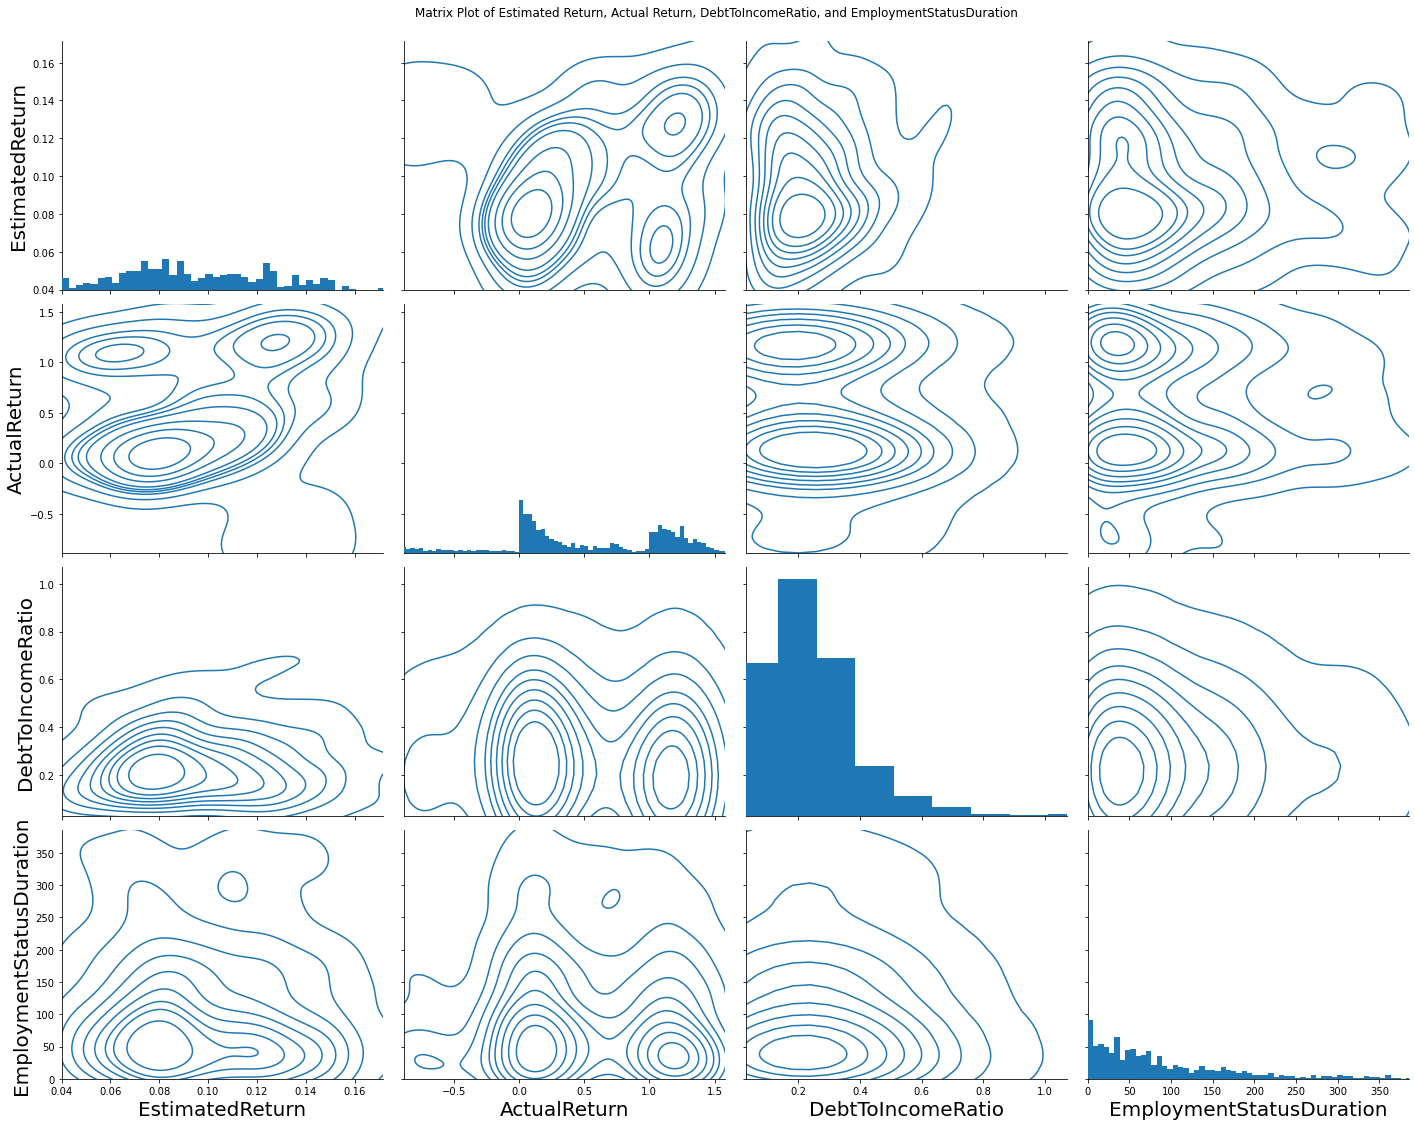

In [22]:
hide_code_in_slideshow()
mpl.rcParams['axes.labelsize'] = 20
df_sample =  df.sample(n = int(df.shape[0] * 0.01))
g = sb.PairGrid(data = df_sample, vars = quantitative_cols, size = 4, aspect = 1.25)
g = g.map_diag(plt.hist, bins = 80)
g = g.map_offdiag(sb.kdeplot)

for i, col_i in enumerate(quantitative_cols):
    for j, col_j in enumerate(quantitative_cols):
        ylim = [df_sample[col_i].quantile(0.01), df_sample[col_i].quantile(0.99)]
        xlim = [df_sample[col_j].quantile(0.01), df_sample[col_j].quantile(0.99)]
        g.axes[i][j].set_xlim(xlim)
        g.axes[i][j].set_ylim(ylim)

g.fig.suptitle("Matrix Plot of Estimated Return, Actual Return, DebtToIncomeRatio, and EmploymentStatusDuration")
g.fig.subplots_adjust(top = .95)
plt.show()

* In bivariate exploration, there is no clear relation regarding to quantitative variables.

### Qualitative vs Qualitative

In [23]:
IncomeRangeLabels = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
ProsperRatingLabels = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']

df['IncomeRange (numeric)'] = df['IncomeRange'].replace(IncomeRangeLabels, range(len(IncomeRangeLabels)))
df['ProsperRating (numeric)'] = df['ProsperRating'].replace(ProsperRatingLabels, range(len(ProsperRatingLabels)))

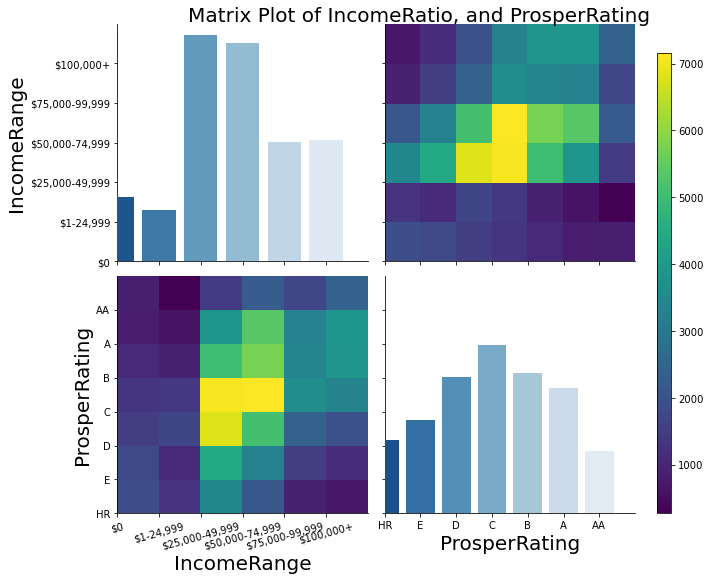

In [24]:
hide_code_in_slideshow()
qualitative_numeric_cols = ['IncomeRange (numeric)', 'ProsperRating (numeric)']
nunique_cols = [len(IncomeRangeLabels), len(ProsperRatingLabels)]
g = sb.PairGrid(data = df, vars = ['IncomeRange (numeric)', 'ProsperRating (numeric)'], size = 4, aspect = 1.25)
g = g.map_diag(sb.countplot, palette = 'Blues_r')

for (i, j) in ((1, 0), (0, 1)):
    src = g.axes[i][j].hist2d(x = qualitative_numeric_cols[j], y = qualitative_numeric_cols[i], 
                        bins = [np.arange(0, nunique_cols[j]+1, 1), np.arange(0, nunique_cols[i]+1, 1)], data = df)
    im = src[-1]
    
g.axes[1][0].set_xticks(range(len(IncomeRangeLabels)))
g.axes[1][0].set_xticklabels(IncomeRangeLabels, rotation = 15)
g.axes[1][0].set_xlabel('IncomeRange')
g.axes[1][1].set_xticks(range(len(ProsperRatingLabels)))
g.axes[1][1].set_xticklabels(ProsperRatingLabels, rotation = 0)
g.axes[1][1].set_xlabel('ProsperRating')

g.axes[0][0].set_yticks(range(len(IncomeRangeLabels)))
g.axes[0][0].set_yticklabels(IncomeRangeLabels, rotation = 0)
g.axes[0][0].set_ylabel('IncomeRange')
g.axes[1][0].set_yticks(range(len(ProsperRatingLabels)))
g.axes[1][0].set_yticklabels(ProsperRatingLabels, rotation = 0)
g.axes[1][0].set_ylabel('ProsperRating')

plt.subplots_adjust(bottom = 0.1, right = 0.8, top = 0.9)
cax = plt.axes([0.83, 0.1, 0.02, 0.8])
plt.colorbar(im, cax=cax)

g.fig.suptitle("Matrix Plot of IncomeRatio, and ProsperRating", fontsize = 20)
g.fig.subplots_adjust(top = .95)

* In this dataset have two qualitative columns, `IncomeRange` and `ProsperRating`
* `IncomeRange` and `ProsperRating` columns modes are centered.
* Most people are distributed at the center of `IncomeRange` and `ProsperRating` 
* People who are higher `IncomeRange` have higher `ProsperRating` 

### Qualitative vs Quantitative

In [25]:
IncomeRangeLabels = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
ProsperRatingLabels = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
LoanStatusLabels = ['Defaulted', 'Cancelled', 'Chargedoff', 'Current', 'FinalPaymentInProgress', 'Completed', 
       'Past Due']

df['LoanStatus'] = df['LoanStatus'].apply(lambda x : 'Past Due' if x.find('Past Due') >= 0 else x)

df['LoanStatus (numeric)'] = df['LoanStatus'].replace(LoanStatusLabels, range(len(LoanStatusLabels)))
df['IncomeRange (numeric)'] = df['IncomeRange'].replace(IncomeRangeLabels, range(len(IncomeRangeLabels)))
df['ProsperRating (numeric)'] = df['ProsperRating'].replace(ProsperRatingLabels, range(len(ProsperRatingLabels)))

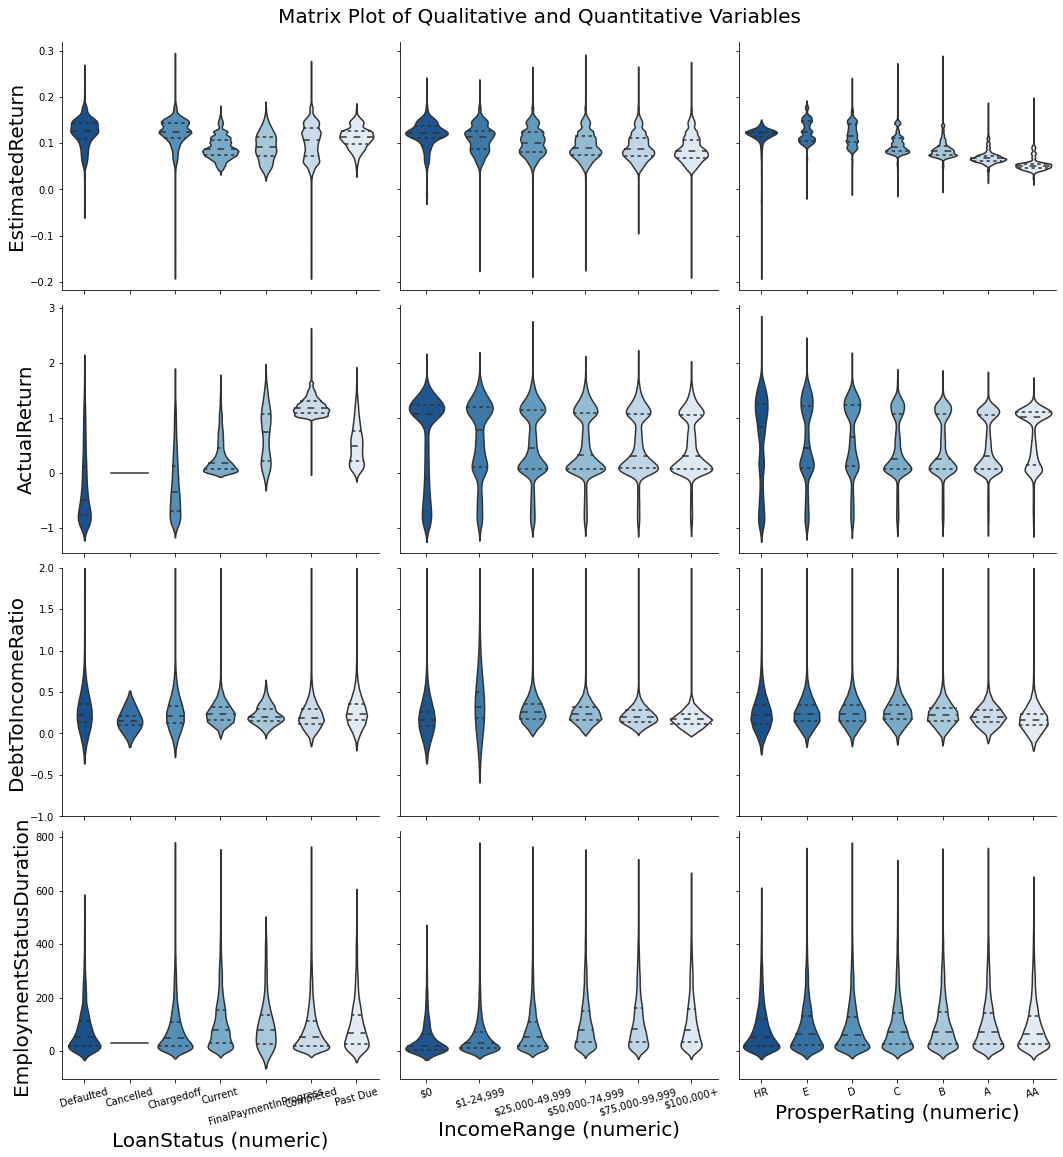

In [26]:
hide_code_in_slideshow()
g = sb.PairGrid(df, 
                x_vars = ['LoanStatus (numeric)', 'IncomeRange (numeric)', 'ProsperRating (numeric)'], 
                y_vars = quantitative_cols, 
                size = 4, aspect = 1.25)
g.map(sb.violinplot, inner = 'quartile', palette = 'Blues_r')

g.axes[3][0].set_xticks(range(len(LoanStatusLabels)))
g.axes[3][0].set_xticklabels(LoanStatusLabels, rotation = 15)
g.axes[3][1].set_xticks(range(len(IncomeRangeLabels)))
g.axes[3][1].set_xticklabels(IncomeRangeLabels, rotation = 15)
g.axes[3][2].set_xticks(range(len(ProsperRatingLabels)))
g.axes[3][2].set_xticklabels(ProsperRatingLabels, rotation = 15)

g.axes[2][0].set_ylim([-1, 2])


g.fig.suptitle("Matrix Plot of Qualitative and Quantitative Variables", fontsize = 20)
g.fig.subplots_adjust(top = .95)

* `EstimatedReturn` vs `LoanStatus`: In `Current`, `FinalPaymentingProcess` and `Past Due` status, Distribution of `EstimatedReturn` is more dense than other status.
* `EstimatedReturn` vs `IncomeRange`: Mode of `EstimatedReturn` decreases as `IncomeRange` increases.
* `EstimatedReturn` vs `ProsperRating`: Mode of `EstimatedReturn` decrease as `ProsperRating` increase.
* `ActualReturn` vs `LoanStatus`: The highest mode in `ActualReturn` is when `LoanStatus` is `Completed`, and some `LoanStatus` is different in the range of `ActualReturn`.
* `ActualReturn` vs `IncomeRange`: The higher the `IncomeRange`, the higher the frequency of 0 `ActualReturn`.
* `ActualReturn` vs `ProsperRating`: The higher the `ProsperRating`, the higher the frequency of non-zero `ActualReturn`.
* `DebtToIncomeRatio` and `EmploymentStatusDuration` cannot be found that relationship of other  variables.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
First of all, I war surprised that `EstimatedReturn` and `ActualReturn` had little relation. The characteristic of `ActualReturn` became prominent when it was classified as `LoanStatus`.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Surprisingly, the `EmploymentStatusDuration` does not have a significant impact on the `ProsperRating`. In addition, the `IncomeRange` also seems to play a small role in the `EmploymentStatusDuration`.

## Multivariate Exploration

### Heatmap

In [27]:
def CreateHeatMap(data, index, column, value, func = lambda x: x.median(), cbar_label = "", ax = None):
    temp = func(data.groupby([index, column])[value])
    temp = temp.reset_index(name = 'Value')
    temp = temp.pivot(index = index, columns = column, values = 'Value')
    
    if ax is None:
        ax = plt.gca()
        
    ax = sb.heatmap(temp, annot = True, fmt = '.1f', cbar_kws = {'label':cbar_label}, ax = ax)
    return ax    

In [28]:
hide_code_in_slideshow()
mpl.rcParams['axes.labelsize'] = 13
labels = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']

df['AmountOfEstimatedReturn'] = df['LoanOriginalAmount'] * df['EstimatedReturn']
df['AmountOfActualReturn'] = df['LoanOriginalAmount'] * df['ActualReturn']

f_med = lambda x: x.median() * 100
f_mean = lambda x : x.mean()

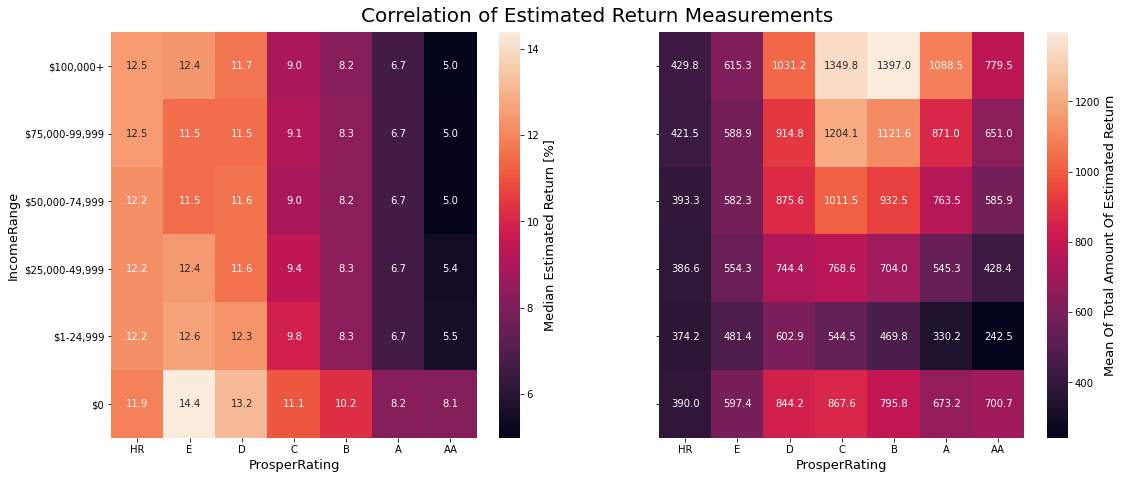

In [41]:
hide_code_in_slideshow()
fig, axes = plt.subplots(1, 2, figsize = (18, 7))

axes[0] = CreateHeatMap(data = df, 
                        index = 'IncomeRange', 
                        column = 'ProsperRating', 
                        value = 'EstimatedReturn', 
                        func = f_med, cbar_label = "Median Estimated Return [%]", ax = axes[0])

axes[1] = CreateHeatMap(data = df, 
                        index = 'IncomeRange', 
                        column = 'ProsperRating', 
                        value = 'AmountOfEstimatedReturn', 
                        func = f_mean, cbar_label = "Mean Of Total Amount Of Estimated Return", ax = axes[1])

axes[1].set_yticklabels("")
axes[1].set_ylabel("")
fig.suptitle("Correlation of Estimated Return Measurements", size = 20)
fig.subplots_adjust(top = .93)
plt.savefig("Correlation of Estimated Return Measurements.png")
plt.show()


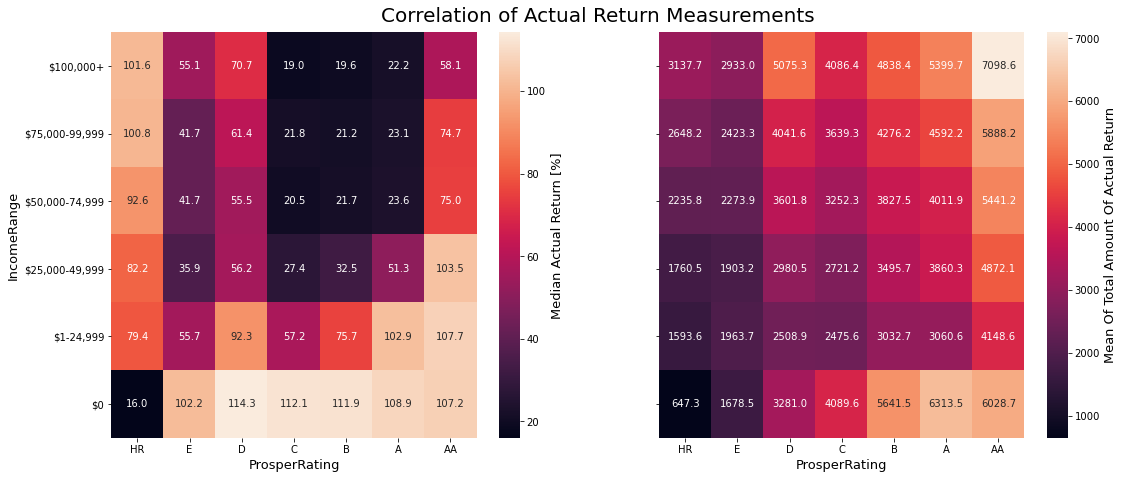

In [42]:
hide_code_in_slideshow()
fig, axes = plt.subplots(1, 2, figsize = (18, 7))

axes[0] = CreateHeatMap(data = df, 
                        index = 'IncomeRange', 
                        column = 'ProsperRating', 
                        value = 'ActualReturn', 
                        func = f_med, cbar_label = "Median Actual Return [%]", ax = axes[0])

axes[1] = CreateHeatMap(data = df, 
                        index = 'IncomeRange', 
                        column = 'ProsperRating', 
                        value = 'AmountOfActualReturn', 
                        func = f_mean, cbar_label = "Mean Of Total Amount Of Actual Return", ax = axes[1])
axes[1].set_yticklabels("")
axes[1].set_ylabel("")
fig.suptitle("Correlation of Actual Return Measurements", size = 20)
fig.subplots_adjust(top = .93)
plt.savefig("Correlation of Actual Return Measurements.png")
plt.show()

### Correlation of Estimated and Actual Return by Loan Status and Prosper Rating

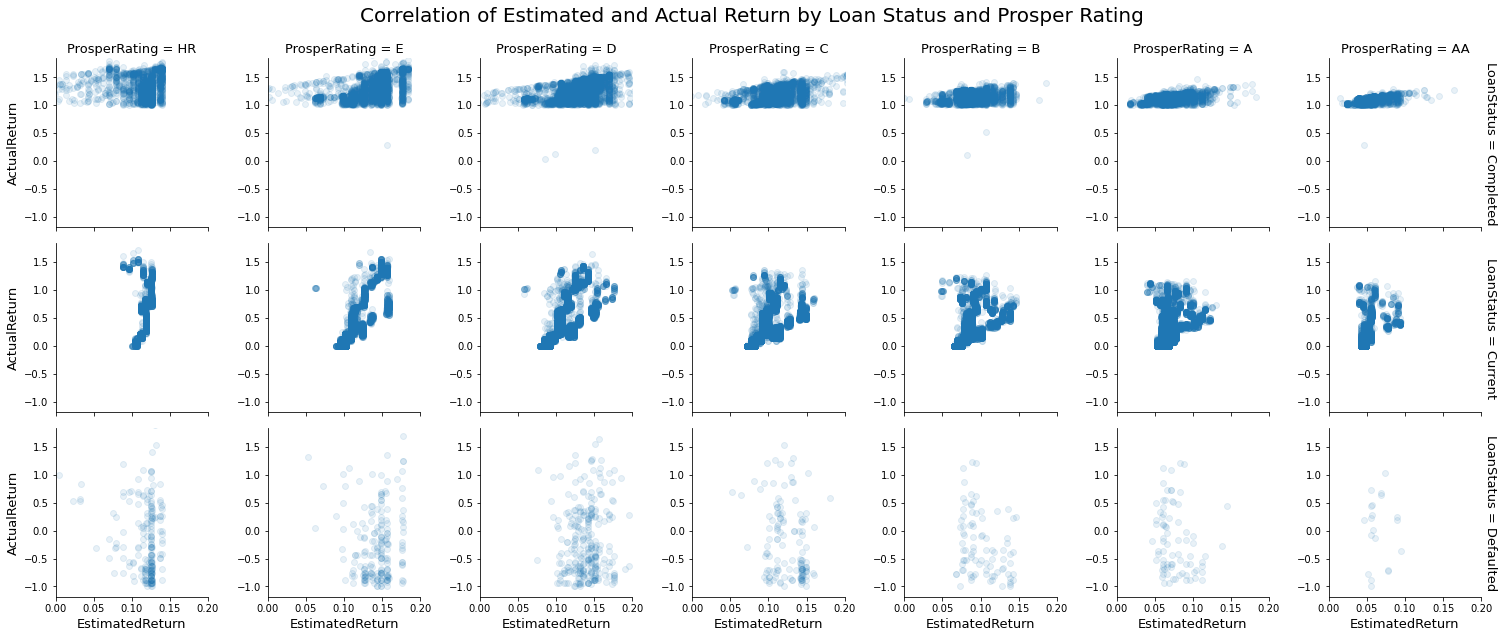

In [43]:
hide_code_in_slideshow()
g = sb.FacetGrid(data = df, col = 'ProsperRating', row = 'LoanStatus', row_order = ['Completed', 'Current', 'Defaulted'], 
                 margin_titles = True, xlim = (0, .2), sharey = False)
g.map(plt.scatter, 'EstimatedReturn', 'ActualReturn', alpha = 1/10)

ymin = df['ActualReturn'].quantile(0.01)
ymax = df['ActualReturn'].quantile(0.99)
margin = (ymax - ymin) * 0.1
    
for i, axes in enumerate(g.axes):
    row_name = g.row_names[i]
    for ax in axes:
        ax.set_ylim([ymin - margin, ymax + margin])
        
g.fig.suptitle("Correlation of Estimated and Actual Return by Loan Status and Prosper Rating", size = 20)
g.fig.subplots_adjust(top = .9);

plt.savefig("Correlation of Estimated and Actual Return by Loan Status and Prosper Rating.png")
plt.show()

* Almost people's estimated return is distributed between 0.1 and 0.2
* Actual return is more densley distributed as the prosper rating is better.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

#### Estimated Return
I checked the trend of median estimated return according to prosper rating and income range. Naturally, it was expected that the higher the prosper rating and income range, the higher the median estimated return, but in fact, the opposite trend was observed. The highest median estimated return was occupied by the lowest prosper rating and the lowest income range. Also, in most cases, the median estimated return was highest when the income range was 0. The case similar to the expected trend was when the return amount was calculated directly, not the return ratio according to the total loan amount. Mean of total amount of estimated return was highest when the prosper rating was ‘C’ or ‘B’ and the income range was the largest. Surprisingly, those with incomes of 1 to 24,999 tended to be lower than those with zero income.

#### Actual Return
In the case of medium actual return, there was a difference from the originally expected trend. Except for the case where the Prosper rating is HR, the income range of $0 is the highest in the remaining ratings. The prosper rating, which seems to be the most stable section, was C to A, and the income range was between 50,000 and 100,000, with a low score distribution. On the other hand, when the total amount of actual return was calculated, it showed the same distribution as expected. As the prosper rating increased and the income range increased, the total amount of actual return gradually increased.

### Were there any interesting or surprising interactions between features?

The reason that the medium estimated return and the medium actual return were different from what was expected seems to be related to the actual number of loans and the amount of loans. Estimated return and actual return represent the ratio of the actual loan amount to the actual compensation, so in the high-risk section (when the prosper rating is low or the income range is low), higher interest is given compared to the actual compensation. It seems to have a high percentage. On the other hand, the compensation ratio seems to be low because a low interest rate is given to loans that are actually large enough and distributed in a stable range.
